In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Casestudy/Spotify-2000.csv')
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df.drop('Index', inplace=True, axis=1)

In [ ]:
df1 = df.copy()

In [ ]:
df1.sample(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1473,Breakthru - Remastered 2011,Queen,glam rock,1989,90,86,57,-6,36,31,248,6,9,48
1491,Monkey Gone to Heaven,Pixies,alternative rock,1989,116,39,65,-12,32,60,177,2,3,61
620,For Bitter Or Worse,Anouk,dutch indie,2015,83,41,27,-8,12,32,255,29,3,21
1090,Baker Street,Gerry Rafferty,album rock,1978,114,35,50,-14,26,42,366,9,3,69
1867,River Deep - Mountain High,Ike & Tina Turner,brill building pop,1966,83,75,39,-7,14,27,215,78,4,57


In [ ]:
df1.shape

(1994, 14)

**1. Data Pre-Processing**

Getting rid of unwanted/irrelevant columns

In [ ]:
df1 = df.drop(['Valence','Acousticness'], axis=1)
df1

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Length (Duration),Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,201,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,207,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,341,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,269,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,256,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,128,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,136,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,162,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,324,4,65


In [ ]:
df1.rename(columns={'Beats Per Minute (BPM)':'BPM','Loudness (dB)':'Loudness','Length (Duration)':'Length'},inplace=True)

Analyzing the dataset

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1994 non-null   object
 1   Artist        1994 non-null   object
 2   Top Genre     1994 non-null   object
 3   Year          1994 non-null   int64 
 4   BPM           1994 non-null   int64 
 5   Energy        1994 non-null   int64 
 6   Danceability  1994 non-null   int64 
 7   Loudness      1994 non-null   int64 
 8   Liveness      1994 non-null   int64 
 9   Length        1994 non-null   object
 10  Speechiness   1994 non-null   int64 
 11  Popularity    1994 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 187.1+ KB


In [ ]:
df1.describe()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,55.000000,100.00000


Finding null values

In [ ]:
df2 = df1.copy()
df2.isna().sum()

Title           0
Artist          0
Top Genre       0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Length          0
Speechiness     0
Popularity      0
dtype: int64

In [ ]:
df2.isna().sum().sum()
#no null values are present

0

Finding and Removing Duplicated Values

In [ ]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1989    False
1990    False
1991    False
1992    False
1993    False
Length: 1994, dtype: bool

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2[df2.duplicated() == True]

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Length,Speechiness,Popularity


Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


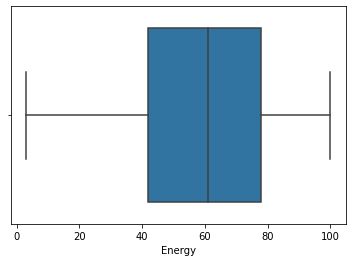

In [ ]:
sns.boxplot(df2['Energy'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


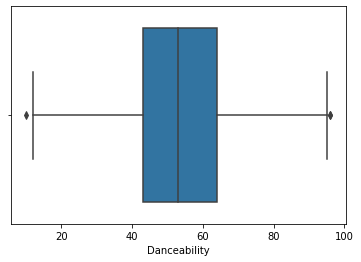

In [ ]:
sns.boxplot(df2['Danceability'])

Detection Using Mathematical Formula

In [ ]:
q25,q75=np.percentile(df2['Danceability'],25),np.percentile(df2['Danceability'],75)
iqr=q75-q25

In [ ]:
cut_off = iqr*1.5
lower,upper=q25-cut_off,q75+cut_off

In [ ]:
upper

95.5

In [ ]:
lower

11.5

In [ ]:
outliers = [x for x in df2['Danceability'] if (x<lower) or (x>upper)]

In [ ]:
len(outliers)

3

In [ ]:
outliers

[96, 10, 96]

In [ ]:
df2[(df2['Danceability']==96) | (df2['Danceability']==10)]

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Length,Speechiness,Popularity
1477,Kingston Town,UB40,reggae fusion,1989,102,25,96,-13,4,228,6,49
1650,Live Forever - Remastered,Oasis,britpop,1994,84,79,10,-4,36,277,4,55
1752,Around the World,Daft Punk,electro,1997,121,80,96,-5,9,430,15,70


In [ ]:
df2.drop([1477,1650,1752],inplace=True)

In [ ]:
df2[(df2['Danceability']==96) | (df2['Danceability']==10)]

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Length,Speechiness,Popularity


In [ ]:
outliers

[96, 10, 96]

In [ ]:
len(outliers)

3

Data Visualization

[]

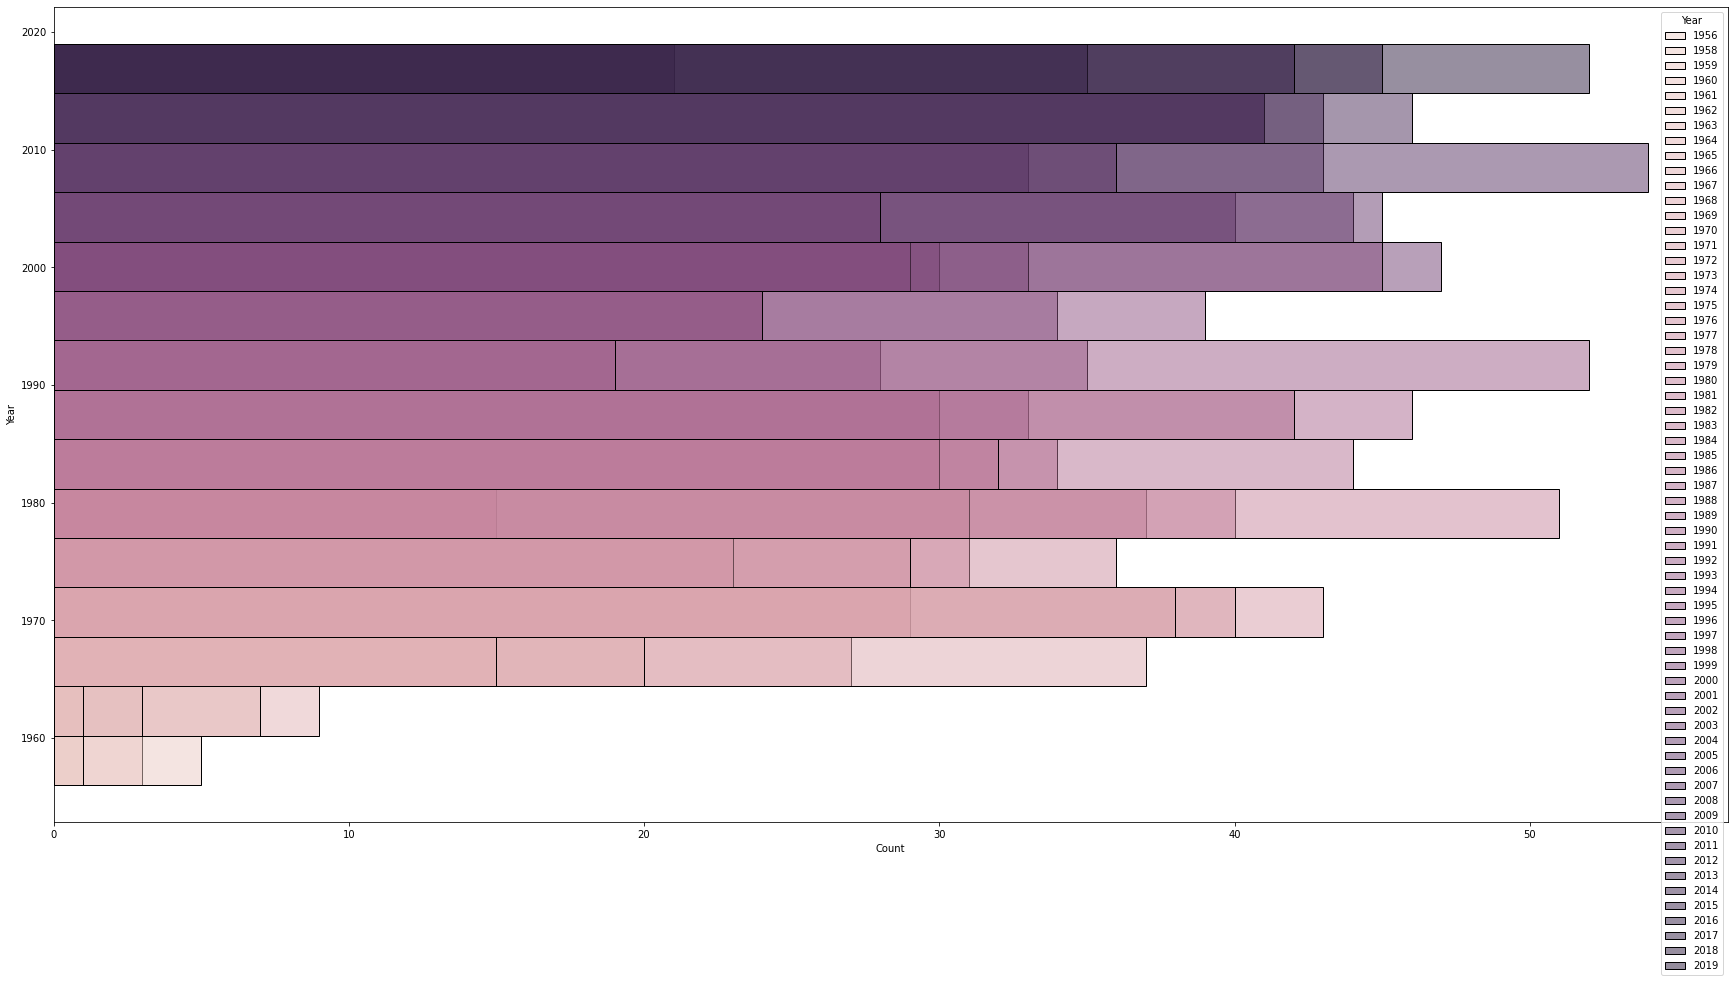

In [ ]:
plt.figure(figsize=(30,15))
sns.histplot(data=df2,y='Year',hue="Year")
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Songs')

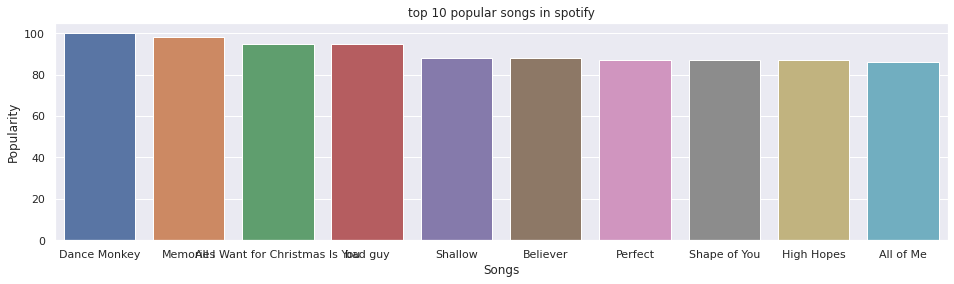

In [ ]:
plt.figure(figsize=(16,4))
sns.set(style='darkgrid')
x=df2.groupby('Title')['Popularity'].max().sort_values(ascending=False).head(10)
ax=sns.barplot(x.index,x)
ax.set_title('top 10 popular songs in spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')

Text(0.5, 0, 'year')

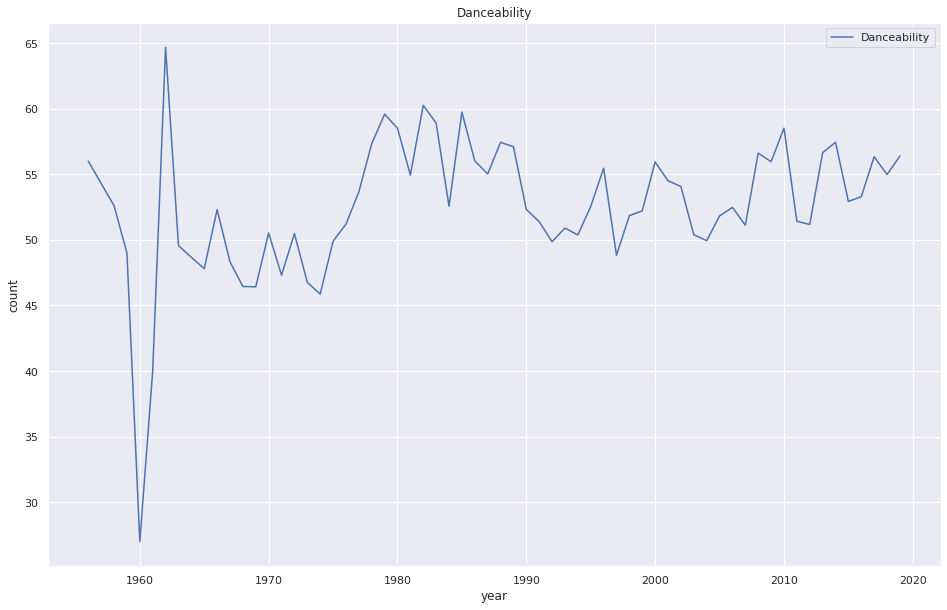

In [ ]:
plt.figure(figsize=(16,10))
sns.set(style='darkgrid')
columns=["Danceability"]
for col in columns:
  x=df2.groupby("Year")[col].mean()
  ax=sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Danceability')
ax.set_ylabel('count')
ax.set_xlabel('year')

Text(0.5, 1.0, 'Scatterplot between energy and danceability')

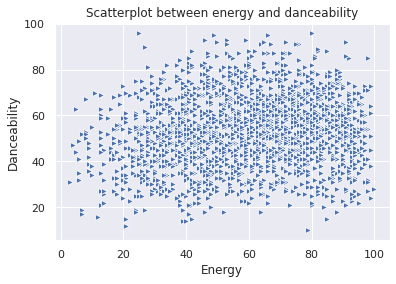

In [ ]:
sns.scatterplot(x='Energy',y='Danceability',data=df,marker='>',linewidth='0.8')
plt.title('Scatterplot between energy and danceability')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


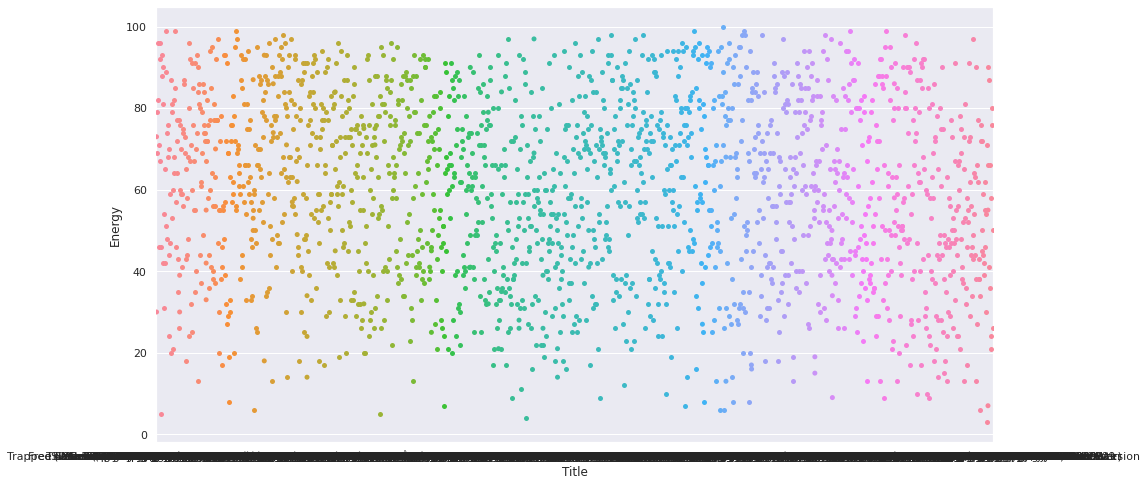

In [40]:
plt.figure(figsize=(15,8))
sns.swarmplot(x=df['Title'],y=df['Energy'])

Text(0.5, 1.0, 'Barplot between energy and loudness')

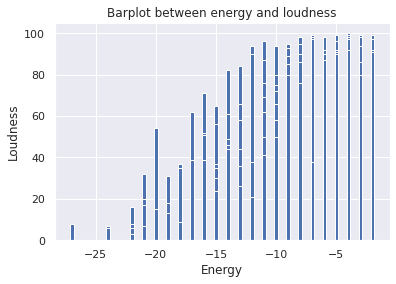

In [41]:
x = df2['Energy']
y = df2['Loudness']
plt.bar(y,x,0.3)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Barplot between energy and loudness')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


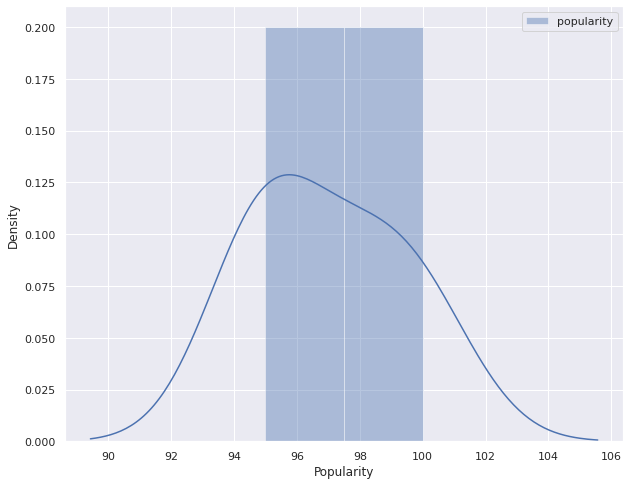

In [42]:
plt.subplots(figsize=(10,8))
sns.distplot(df2.Popularity[df2.Popularity > 90], label='popularity').legend()
plt.show()

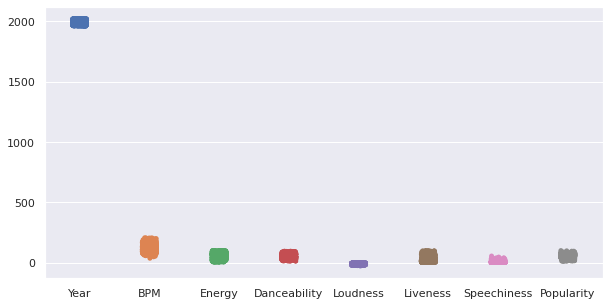

In [43]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df2)

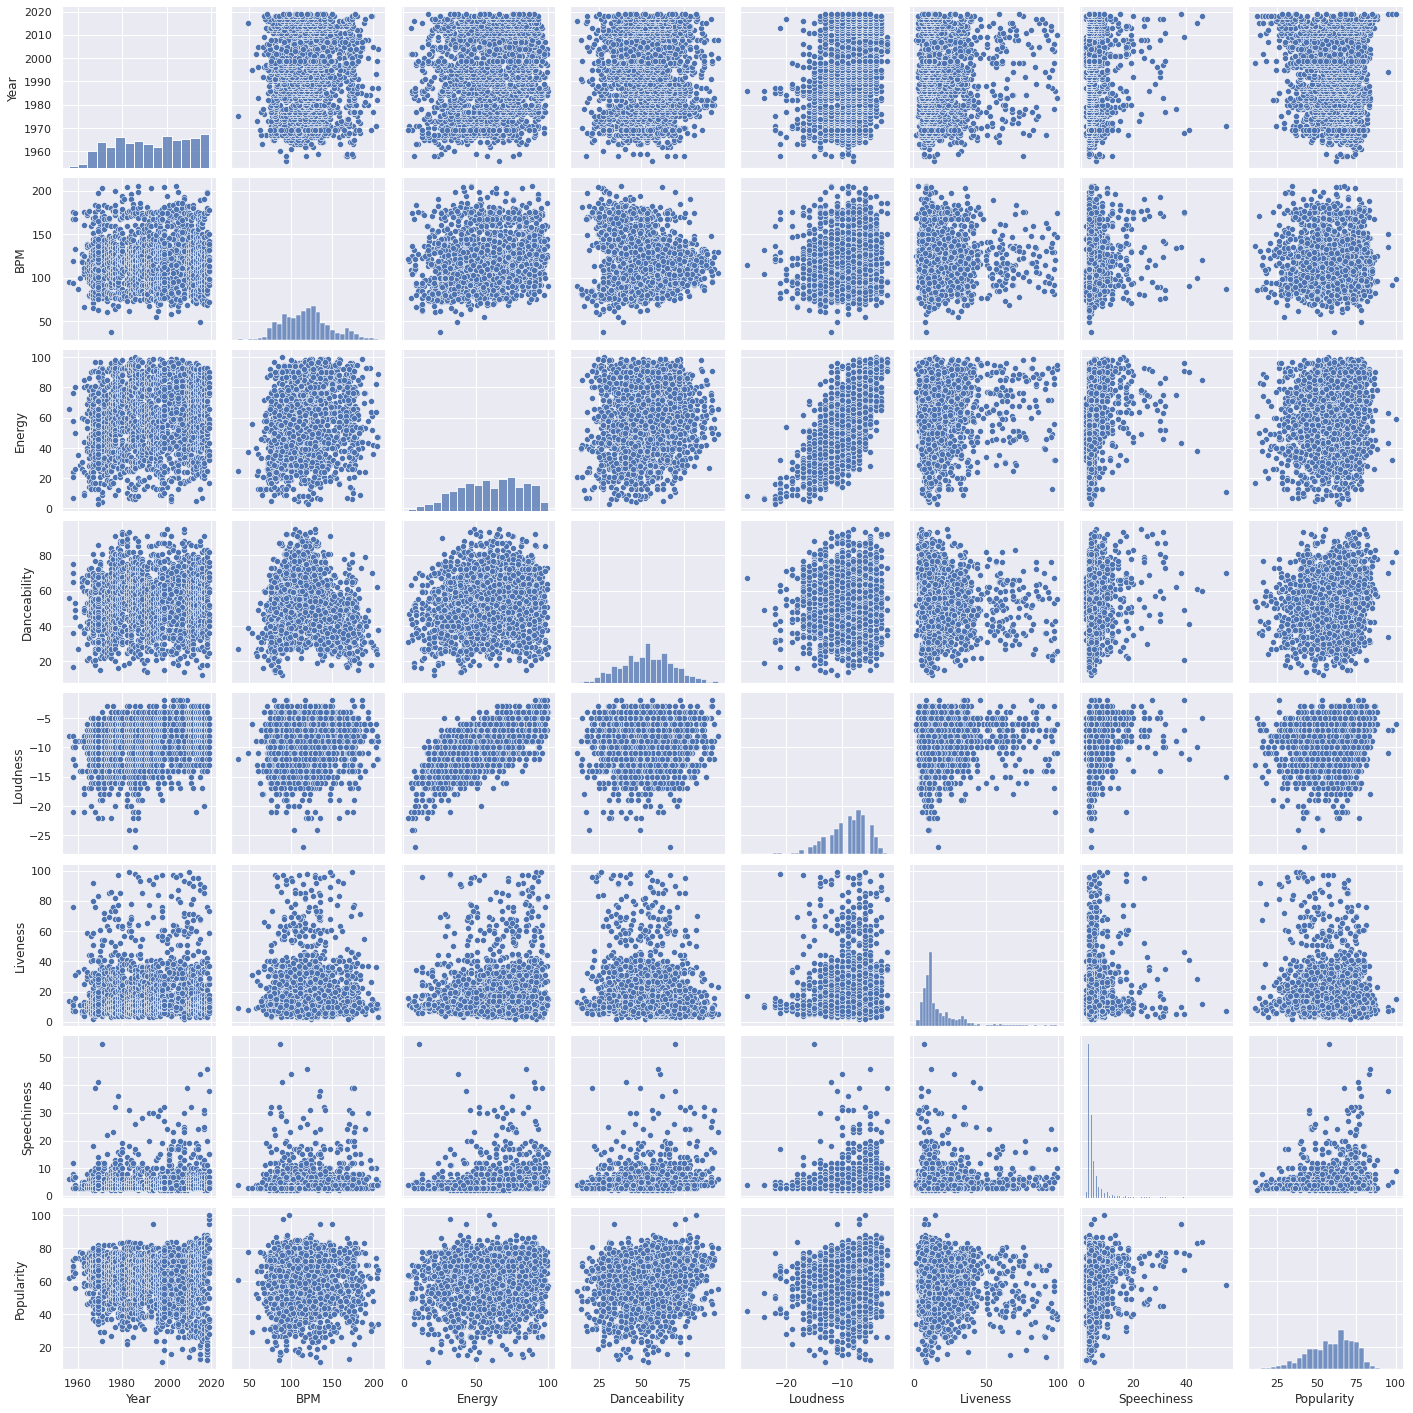

In [44]:
sns.pairplot(df2)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df

In [47]:
df_1 = df[['Title',	'Artist',	'Top Genre']]

In [ ]:
df_1

,Title,Artist,Top Genre
0,Sunrise,Norah Jones,adult standards
1,Black Night,Deep Purple,album rock
2,Clint Eastwood,Gorillaz,alternative hip hop
3,The Pretender,Foo Fighters,alternative metal
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock
...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards
1990,Hound Dog,Elvis Presley,adult standards
1991,Johnny B. Goode,Chuck Berry,blues rock
1992,Take Five,The Dave Brubeck Quartet,bebop


In [ ]:
df_1['Title'] = [x.lower() for x in df_1['Title']] 
df_1['Artist'] = [x.lower() for x in df_1['Artist']]
df_1['Top Genre'] = [x.lower() for x in df_1['Top Genre']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_1

,Title,Artist,Top Genre
0,sunrise,norah jones,adult standards
1,black night,deep purple,album rock
2,clint eastwood,gorillaz,alternative hip hop
3,the pretender,foo fighters,alternative metal
4,waitin' on a sunny day,bruce springsteen,classic rock
...,...,...,...
1989,heartbreak hotel,elvis presley,adult standards
1990,hound dog,elvis presley,adult standards
1991,johnny b. goode,chuck berry,blues rock
1992,take five,the dave brubeck quartet,bebop


In [ ]:
df_1['Top Genre'] = df_1['Top Genre'].map(lambda x: x.split(' '))
df_1['Artist'] = df_1['Artist'].map(lambda x : x.split(" "))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_1

,Title,Artist,Top Genre
0,sunrise,"[norah, jones]","[adult, standards]"
1,black night,"[deep, purple]","[album, rock]"
2,clint eastwood,[gorillaz],"[alternative, hip, hop]"
3,the pretender,"[foo, fighters]","[alternative, metal]"
4,waitin' on a sunny day,"[bruce, springsteen]","[classic, rock]"
...,...,...,...
1989,heartbreak hotel,"[elvis, presley]","[adult, standards]"
1990,hound dog,"[elvis, presley]","[adult, standards]"
1991,johnny b. goode,"[chuck, berry]","[blues, rock]"
1992,take five,"[the, dave, brubeck, quartet]",[bebop]


In [ ]:
for i in range(len(df_1)):
  df_1.loc[i,'Artist'] = ''.join(df_1.loc[i,'Artist'])

for i in range(len(df1)):
  df_1.loc[i,'Top Genre'] = ''.join(df_1.loc[i,'Top Genre']) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_1

,Title,Artist,Top Genre
0,sunrise,norahjones,adultstandards
1,black night,deeppurple,albumrock
2,clint eastwood,gorillaz,alternativehiphop
3,the pretender,foofighters,alternativemetal
4,waitin' on a sunny day,brucespringsteen,classicrock
...,...,...,...
1989,heartbreak hotel,elvispresley,adultstandards
1990,hound dog,elvispresley,adultstandards
1991,johnny b. goode,chuckberry,bluesrock
1992,take five,thedavebrubeckquartet,bebop


In [ ]:
def get_important_features_model1(data):
  keywords = []
  for i in range(0, data.shape[0]):
    keywords.append(data['Artist'][i] + ' ' + data['Top Genre'][i])
  return keywords

In [ ]:
df_1['keywords'] = get_important_features_model1(df_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1

,Title,Artist,Top Genre,keywords
0,sunrise,norahjones,adultstandards,norahjones adultstandards
1,black night,deeppurple,albumrock,deeppurple albumrock
2,clint eastwood,gorillaz,alternativehiphop,gorillaz alternativehiphop
3,the pretender,foofighters,alternativemetal,foofighters alternativemetal
4,waitin' on a sunny day,brucespringsteen,classicrock,brucespringsteen classicrock
...,...,...,...,...
1989,heartbreak hotel,elvispresley,adultstandards,elvispresley adultstandards
1990,hound dog,elvispresley,adultstandards,elvispresley adultstandards
1991,johnny b. goode,chuckberry,bluesrock,chuckberry bluesrock
1992,take five,thedavebrubeckquartet,bebop,thedavebrubeckquartet bebop


In [ ]:
df_1.set_index('Title', inplace=True)

In [ ]:
cm1 = CountVectorizer().fit_transform(df_1['keywords'])

In [ ]:
indices1 = pd.Series(df_1.index)
indices1[:7]

0                                  sunrise
1                              black night
2                           clint eastwood
3                            the pretender
4                   waitin' on a sunny day
5    the road ahead (miles of the unknown)
6                        she will be loved
Name: Title, dtype: object

In [ ]:
cs1 = cosine_similarity(cm)

In [ ]:
cosine_sim1 = cosine_similarity(cm1, cm1)
cosine_sim1

array([[1. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 1. ]])

In [ ]:
cosine_sim1.shape

(1994, 1994)

In [ ]:
def recommendation_model1(Title, cosine_sim = cosine_sim1):
  recommended_songs = []

  idx = indices1[indices1 == Title].index[0]

  score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

  top_10_indexes = list(score_series.iloc[2:11].index)
  print("Based on your search, here are some Songs of similar Genre and Artist: ")
  for i in top_10_indexes:
    recommended_songs.append(list(df_1.index)[i])
  return recommended_songs

In [ ]:
recommendation_model1('crazy')

Based on your search, here are some Songs of similar Genre and Artist: 


['hometown glory',
 'all i ask',
 'rumour has it',
 'fairground',
 'turning tables',
 'iron sky',
 'rolling in the deep',
 'make you feel my love',
 'set fire to the rain']

#Recommendation model -2

In [ ]:
df_2 = df[['Title', 'Energy',	'Danceability', 'Speechiness']]

In [ ]:
df_2

,Title,Energy,Danceability,Speechiness
0,Sunrise,30,53,3
1,Black Night,79,50,7
2,Clint Eastwood,69,66,17
3,The Pretender,96,43,4
4,Waitin' On A Sunny Day,82,58,3
...,...,...,...,...
1989,Heartbreak Hotel,21,70,7
1990,Hound Dog,76,36,6
1991,Johnny B. Goode,80,53,7
1992,Take Five,26,45,4


In [ ]:
df_2['Title'] = [x.lower() for x in df_2['Title']] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2['Energy'] = df_2['Energy'].map(str)
df_2['Danceability'] = df_2['Danceability'].map(str)
df_2['Speechiness'] = df_2['Speechiness'].map(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_2.set_index('Title', inplace=True)

In [ ]:
def get_important_features_model2(data):
  keywords = []
  for i in range(0, data.shape[0]):
    keywords.append(data['Energy'][i] + ' ' + data['Danceability'][i] + ' ' + data['Speechiness'][i])
  return keywords  

In [ ]:
df_2['keywords'] = get_important_features_model2(df_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2

,Energy,Danceability,Speechiness,keywords
Title,,,,
sunrise,30,53,3,30 53 3
black night,79,50,7,79 50 7
clint eastwood,69,66,17,69 66 17
the pretender,96,43,4,96 43 4
waitin' on a sunny day,82,58,3,82 58 3
...,...,...,...,...
heartbreak hotel,21,70,7,21 70 7
hound dog,76,36,6,76 36 6
johnny b. goode,80,53,7,80 53 7


In [ ]:
cm2 = CountVectorizer().fit_transform(df_2['keywords'])

In [ ]:
indices2 = pd.Series(df_2.index)
indices2[:7]

0                                  sunrise
1                              black night
2                           clint eastwood
3                            the pretender
4                   waitin' on a sunny day
5    the road ahead (miles of the unknown)
6                        she will be loved
Name: Title, dtype: object

In [ ]:
cs2 = cosine_similarity(cm2)

In [ ]:
cosine_sim2 = cosine_similarity(cm2, cm2)
cosine_sim2

array([[1. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 1. ]])

In [ ]:
cosine_sim2.shape

(1994, 1994)

In [ ]:
def recommendation_model2(Title, cosine_sim = cosine_sim2):
  recommended_songs = []

  idx = indices2[indices2 == 'crazy'].index[0]

  score_series = pd.Series(cosine_sim2[idx]).sort_values(ascending = False)

  top_10_indexes = list(score_series.iloc[2:11].index)
  print('Based on your search, here are some Songs of similar Metadata: ')
  for i in top_10_indexes:
    recommended_songs.append(list(df_2.index)[i])
  return recommended_songs

In [ ]:
recommendation_model2('crazy')

Based on your search, here are some Songs of similar Metadata: 


['superstition - single version',
 'i see fire',
 'op fietse',
 'in the end',
 'penny lane',
 'what it is',
 'spicks and specks',
 'black dog - remaster',
 "why can't this be love"]

#Recommendation model-3

In [ ]:
df_3 = df[['Title',	'Artist',	'Top Genre',	'Energy',	'Danceability', 'Speechiness']]

In [ ]:
df_3

,Title,Artist,Top Genre,Energy,Danceability,Speechiness
0,Sunrise,Norah Jones,adult standards,30,53,3
1,Black Night,Deep Purple,album rock,79,50,7
2,Clint Eastwood,Gorillaz,alternative hip hop,69,66,17
3,The Pretender,Foo Fighters,alternative metal,96,43,4
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,82,58,3
...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,21,70,7
1990,Hound Dog,Elvis Presley,adult standards,76,36,6
1991,Johnny B. Goode,Chuck Berry,blues rock,80,53,7
1992,Take Five,The Dave Brubeck Quartet,bebop,26,45,4


In [ ]:
df_3['Title'] = [x.lower() for x in df_3['Title']] 
df_3['Artist'] = [x.lower() for x in df_3['Artist']]
df_3['Top Genre'] = [x.lower() for x in df_3['Top Genre']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_3

,Title,Artist,Top Genre,Energy,Danceability,Speechiness
0,sunrise,norah jones,adult standards,30,53,3
1,black night,deep purple,album rock,79,50,7
2,clint eastwood,gorillaz,alternative hip hop,69,66,17
3,the pretender,foo fighters,alternative metal,96,43,4
4,waitin' on a sunny day,bruce springsteen,classic rock,82,58,3
...,...,...,...,...,...,...
1989,heartbreak hotel,elvis presley,adult standards,21,70,7
1990,hound dog,elvis presley,adult standards,76,36,6
1991,johnny b. goode,chuck berry,blues rock,80,53,7
1992,take five,the dave brubeck quartet,bebop,26,45,4


In [ ]:
df_3['Top Genre'] = df_3['Top Genre'].map(lambda x: x.split(' '))
df_3['Artist'] = df_3['Artist'].map(lambda x : x.split(" "))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_3

,Title,Artist,Top Genre,Energy,Danceability,Speechiness
0,sunrise,"[norah, jones]","[adult, standards]",30,53,3
1,black night,"[deep, purple]","[album, rock]",79,50,7
2,clint eastwood,[gorillaz],"[alternative, hip, hop]",69,66,17
3,the pretender,"[foo, fighters]","[alternative, metal]",96,43,4
4,waitin' on a sunny day,"[bruce, springsteen]","[classic, rock]",82,58,3
...,...,...,...,...,...,...
1989,heartbreak hotel,"[elvis, presley]","[adult, standards]",21,70,7
1990,hound dog,"[elvis, presley]","[adult, standards]",76,36,6
1991,johnny b. goode,"[chuck, berry]","[blues, rock]",80,53,7
1992,take five,"[the, dave, brubeck, quartet]",[bebop],26,45,4


In [ ]:
for i in range(len(df_3)):
  df_3.loc[i,'Artist'] = ''.join(df_3.loc[i,'Artist'])

for i in range(len(df_3)):
  df_3.loc[i,'Top Genre'] = ''.join(df_3.loc[i,'Top Genre']) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df_3

,Title,Artist,Top Genre,Energy,Danceability,Speechiness
0,sunrise,norahjones,adultstandards,30,53,3
1,black night,deeppurple,albumrock,79,50,7
2,clint eastwood,gorillaz,alternativehiphop,69,66,17
3,the pretender,foofighters,alternativemetal,96,43,4
4,waitin' on a sunny day,brucespringsteen,classicrock,82,58,3
...,...,...,...,...,...,...
1989,heartbreak hotel,elvispresley,adultstandards,21,70,7
1990,hound dog,elvispresley,adultstandards,76,36,6
1991,johnny b. goode,chuckberry,bluesrock,80,53,7
1992,take five,thedavebrubeckquartet,bebop,26,45,4


In [ ]:
df_3.set_index('Title', inplace=True)

In [ ]:
df_3.head()

,Artist,Top Genre,Energy,Danceability,Speechiness
Title,,,,,
sunrise,norahjones,adultstandards,30,53,3
black night,deeppurple,albumrock,79,50,7
clint eastwood,gorillaz,alternativehiphop,69,66,17
the pretender,foofighters,alternativemetal,96,43,4
waitin' on a sunny day,brucespringsteen,classicrock,82,58,3


In [ ]:
df_3['Energy'] = df_3['Energy'].map(str)
df_3['Danceability'] = df_3['Danceability'].map(str)
df_3['Speechiness'] = df_3['Speechiness'].map(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
def get_important_features_model3(data):
  keywords = []
  for i in range(0, data.shape[0]):
    keywords.append(data['Artist'][i] + ' ' + data['Top Genre'][i] + ' ' + data['Energy'][i] + ' ' + data['Danceability'][i] + ' ' + data['Speechiness'][i])
  return keywords  

In [ ]:
df_3['keywords'] = get_important_features_model3(df_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_3

,Artist,Top Genre,Energy,Danceability,Speechiness,keywords
Title,,,,,,
sunrise,norahjones,adultstandards,30,53,3,norahjones adultstandards 30 53 3
black night,deeppurple,albumrock,79,50,7,deeppurple albumrock 79 50 7
clint eastwood,gorillaz,alternativehiphop,69,66,17,gorillaz alternativehiphop 69 66 17
the pretender,foofighters,alternativemetal,96,43,4,foofighters alternativemetal 96 43 4
waitin' on a sunny day,brucespringsteen,classicrock,82,58,3,brucespringsteen classicrock 82 58 3
...,...,...,...,...,...,...
heartbreak hotel,elvispresley,adultstandards,21,70,7,elvispresley adultstandards 21 70 7
hound dog,elvispresley,adultstandards,76,36,6,elvispresley adultstandards 76 36 6
johnny b. goode,chuckberry,bluesrock,80,53,7,chuckberry bluesrock 80 53 7


In [ ]:
cm3 = CountVectorizer().fit_transform(df_3['keywords'])

In [ ]:
indices3 = pd.Series(df_3.index)
indices3[:7]

0                                  sunrise
1                              black night
2                           clint eastwood
3                            the pretender
4                   waitin' on a sunny day
5    the road ahead (miles of the unknown)
6                        she will be loved
Name: Title, dtype: object

In [ ]:
cs3 = cosine_similarity(cm3)

In [ ]:
cosine_sim3 = cosine_similarity(cm3, cm3)
cosine_sim3

array([[1.  , 0.  , 0.  , ..., 0.25, 0.  , 0.25],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.25],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.25, 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.  , ..., 0.  , 0.  , 1.  ]])

In [ ]:
cosine_sim3.shape

(1994, 1994)

In [ ]:
def recommendation(Title, cosine_sim = cosine_sim3):
  recommended_songs = []

  idx = indices3[indices3 == Title].index[0]

  score_series = pd.Series(cosine_sim3[idx]).sort_values(ascending = False)

  top_10_indexes = list(score_series.iloc[2:11].index)
  print('Based on your search, here are some Songs of similar Genre, Artist and metadata :')

  for i in top_10_indexes:
    recommended_songs.append(list(df_3.index)[i])
  return recommended_songs  

In [ ]:
recommendation('crazy')

Based on your search, here are some Songs of similar Genre, Artist and metadata :


['iron sky',
 'gimme shelter',
 'superstition - single version',
 'i see fire',
 'losing my religion',
 'penny lane',
 'in the end',
 'roadhouse blues',
 'hey boy hey girl']

In [ ]:
df3 = df[['Energy',	'Danceability', 'Speechiness',	'Popularity']]

In [ ]:
X = df3.drop('Popularity', axis=1)
y = df3['Popularity']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ().fit(X)

rescaledx=scaler.transform(X)

rescaledx[0:5,:]

array([[-1.3400087 , -0.01552124, -0.45335805],
       [ 0.87230421, -0.21099081,  0.45563738],
       [ 0.42081178,  0.83151359,  2.72812596],
       [ 1.63984134, -0.66708649, -0.2261092 ],
       [ 1.00775194,  0.31026139, -0.45335805]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(rescaledx, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.02


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1 = LogisticRegression()
print(model1.get_params())
model1.fit(X_train, y_train)
model_predictions = model1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.021702838063439065
              precision    recall  f1-score   support

          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
model_predictions = model2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.021702838063439065
              precision    recall  f1-score   support

          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         4
          33       0.00      0.00      0.00         3
          34       0.00      0.00      0.00         3
          35       0.00      0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
